# **Titanic Data Analysis & Prediction **

<font size="3">Mike Fan<br><br>

May 22th, 2020</font>

# Background & Introduction 

Titanic is definitely a great kickstart for beginning my journey at Kaggle, the largest playground for data scientists in the globe. As one of the well-known and largest Brithsh passenger liners at the early 20 century, RMS Titanic had experienced a huge trategy during its maiden voyage from Southampton to New York City. At April 15, 1912, the lurious ocean palance sanked after striking an iceberg during its journey of passing through the North Altanic Ocean. This trategy had caused more than 1500 passangers and crews died in the ocean. It was seen as one of the most serious marine disasters in the world. During the following decades, there were a lot of books, atricles and movies trying to reappear that horrible night and some had made it an even romantic story such as the famous "Jack and Rose" film in 1997. This movie has also made Titanic known to almost everyone in the world. 

In the next sections, I will try to analyze the survival status data to figure out the features (e.g. age, gender, social class) that had affected if a passenger would survive during that horrible night at April 15th, 1912. Then, I will apply some machine learning models to predict the survival circumstances based on the personal characteriastics. The sequence of my Titanic data analysis are:

1. Problem Definition
2. Data Loading & Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
4. Modeling 
5. Summary 

# **1. Problem Definition**

Problem definition is always the first step of any data analysis project, as it decides the direction and angle of the following technical task. Going through the background and dataset, below are some questions and hypothesis that the data could answer:

* Did the people staying at the advanced cabins have higher rate of survival? 
* Did aged people have less chance to survival? 
* How family size affected the survival status? (did larger family size increased the chance of surviving?) 
* Did gender has any effect on the survival outcome? 
* Is there anything related between a person's title (e.g. Mr., Mrs.) and he/her survival rate? 

After answering these questions and decide which factors are important to our problem, we could put them into machine learning models to make our predictions. Next, let's take a look at the dataset: 

# **2. Data Loading & Cleaning**

**Loading required packages:**

In [1]:
# First let's load the required packages: 
suppressPackageStartupMessages(library(dplyr)) 
suppressPackageStartupMessages(library(ggplot2)) 
suppressPackageStartupMessages(library(tidyr)) 
suppressPackageStartupMessages(library(caret)) 
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(purrr))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(fastDummies))
suppressPackageStartupMessages(library(e1071))
suppressPackageStartupMessages(library(MASS))
suppressPackageStartupMessages(library(rpart))
suppressPackageStartupMessages(library(rpart.plot))
suppressPackageStartupMessages(library(ROCR))
suppressPackageStartupMessages(library(pROC))
suppressWarnings(library(readr))
suppressPackageStartupMessages(library(forcats))

**Loading train and test data, take a look at their structures: **

In [2]:
# Load the training and testing data:
train = read_csv('../input/titanic/train.csv')
test = read_csv('../input/titanic/test.csv')
# The read_csv function will show the read columns and their data types, it won't convert the character value into factor

# Create the survived variable to the test data for concatenation:
test$Survived = NA

# Concate the train and test into a new data "full" to better explore the whole story: 
full = bind_rows(train, test)

# Take a look at the structure and basic info about the full data (similar to the str() function, with heading rows printed out):
glimpse(full)

# Basic summary statistics:
summary(full)

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)



Rows: 1,309
Columns: 12
$ PassengerId <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Survived    <dbl> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, …
$ Pclass      <dbl> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, …
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (F…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "ma…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14,…
$ SibSp       <dbl> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, …
$ Parch       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, …
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "3…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625…
$ Cabin       <chr> NA, "C85", NA, "C123", NA, NA, "E46", NA, NA, NA, "G6", "…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S…


  PassengerId      Survived          Pclass          Name          
 Min.   :   1   Min.   :0.0000   Min.   :1.000   Length:1309       
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 655   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 655   Mean   :0.3838   Mean   :2.295                     
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1309   Max.   :1.0000   Max.   :3.000                     
                NA's   :418                                        
     Sex                 Age            SibSp            Parch      
 Length:1309        Min.   : 0.17   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Median :28.00   Median :0.0000   Median :0.000  
                    Mean   :29.88   Mean   :0.4989   Mean   :0.385  
                    3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.000  
                    Max.   :80.00   Max.  

**** The train dataset has 891 rows and 12 columns, and the test data has 418 rows and 11 columns. There are 1309 rows in the combined data, with 12 variables. Next let's jump to the data cleaning step.****

# Data Cleaning

PassengerId    Survived      Pclass        Name         Sex         Age 
          0         418           0           0           0         263 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1        1014           2 


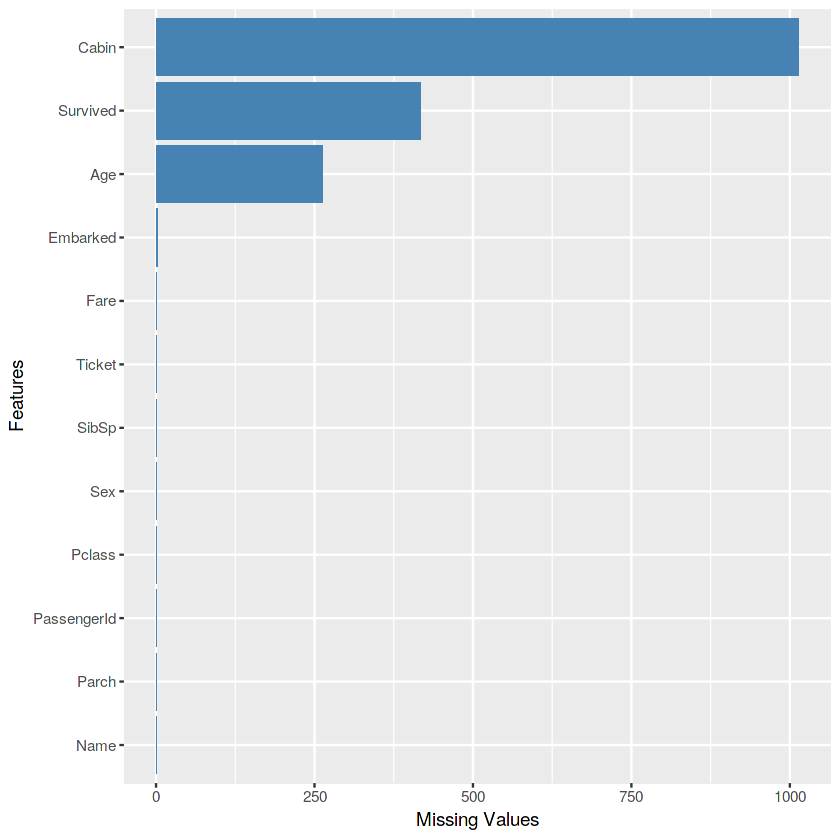

In [3]:
# First, let's check the status of missing values for each column:
missing_values = map_int(full, function(x) {sum(is.na(x)|x=='')})
print(missing_values)

# Let's visulize the missing results:
missing_values = data.frame(columns = factor(names(missing_values)), missing_values = missing_values)
ggplot(missing_values, aes(x = fct_reorder(columns, missing_values), y = missing_values)) + geom_bar(stat = 'identity', fill = 'steelblue') + coord_flip() + xlab("Features") + ylab("Missing Values") 

1. The missing values at Survived variable is 418, which is normal since they belong to the test data; 
2. There are 1014 missing values in the Cabin variable, making it hard to interpret and make up;
3. There are 263 missing values at the Age variable. Since Age could be an important factor to our question, we need to fulfill the missing values by either taking the mean or random values or build regression model to predict these missing values. I will deal with the missing value stuff at the third step; 
4. There are 2 missing values in the Embarked variable, making it easy to make up. 
5. There is 1 missing value in the Fare variable, we could make up it by assigning the mean value

In [4]:
# Let's first start deal with the missing values at the Embarked variable
# This variable showes which Port of Embarkation for the passenger, C stands for Cherbourg, Q stands forQueenstown, andd S stands for Southampton
# Let's assign the mode to the missing values as most people embarked at Southampton. 
table(full$Embarked)
full$Embarked = ifelse(is.na(full$Embarked)|full$Embarked == '', "S", full$Embarked)


  C   Q   S 
270 123 914 

In [5]:
# Make up the missing value of Fare by assigning it the mean value:
full$Fare[is.na(full$Fare)|full$Fare == ''] = mean(full$Fare, na.rm = TRUE)

For the Age variable, since it has more missing values, we could use multiple ways to make up the NAs, such as assigning mean or median values, using regression models or random numbers. Here, I will use a relative simple way, which is assigning random age value to each missing value. First, let's look at if the distributions of males' age and female's age are different:

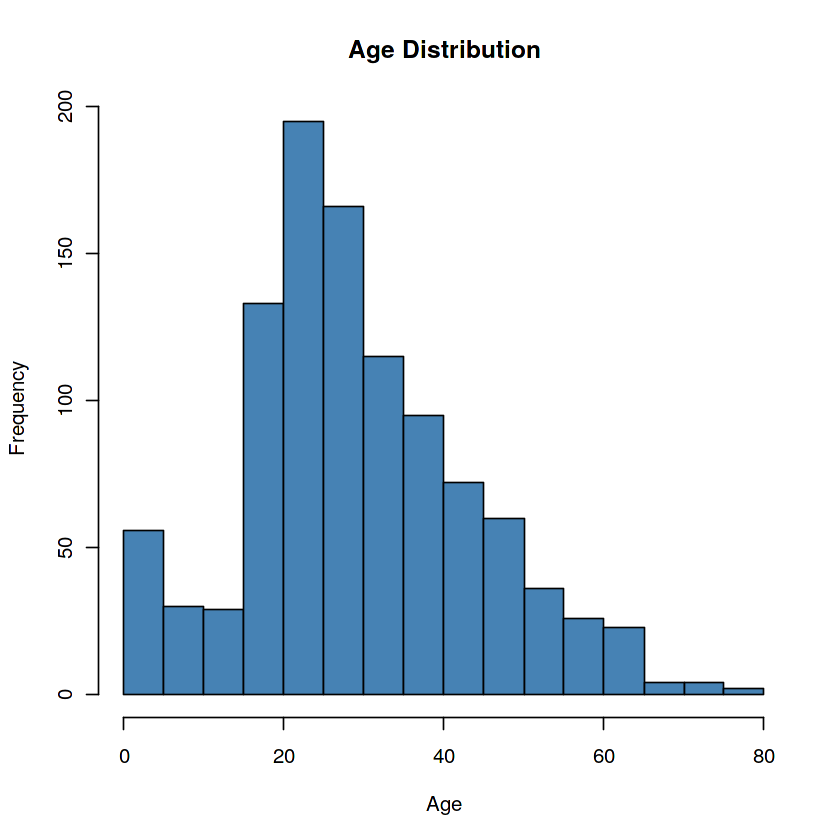

In [6]:
# Histogram of Age for both genders 
hist(full$Age[!is.na(full$Age)], col = 'steelblue', xlab = "Age", main = "Age Distribution")

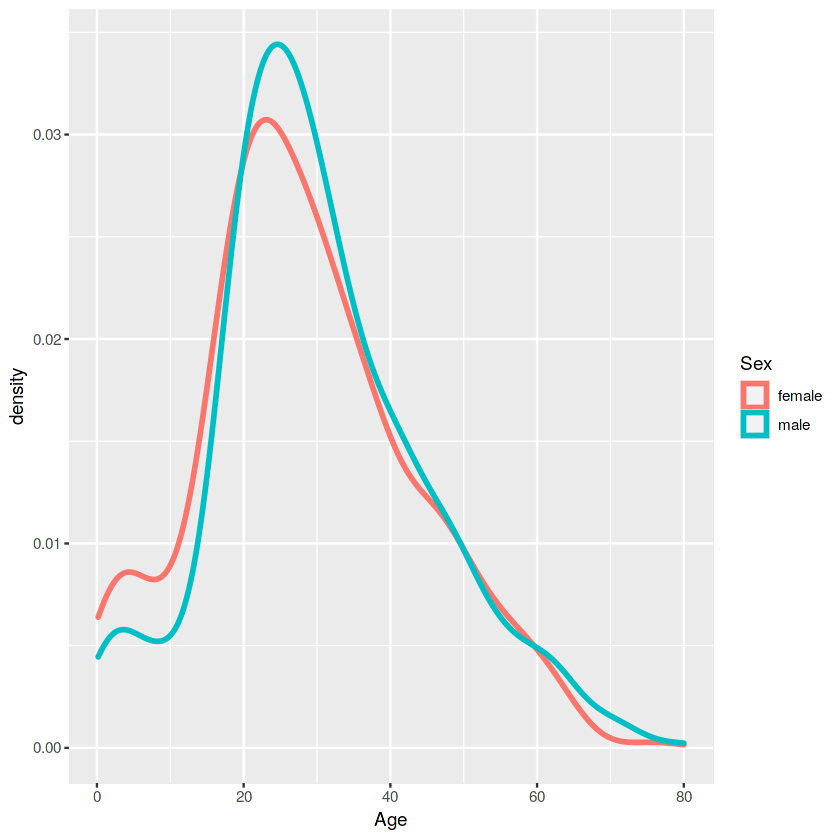

In [7]:
# Density plot of ages for male and female: 
ggplot(data = full[!is.na(full$Age),], aes(x = Age, col = Sex)) + geom_density(size = 1.2)

As we can find here, the height of the density curve of age for male is slightly higher than female in the midddle, which means more males were in their middle ages than females. So I will fill the missing ages here by gender. Now let's deal with the missing values with random number from the Age variable:

In [8]:
# Make two lists of random numbers for assigining the age values to the missings ones 
# Random numbers for male: 
table(full$Sex[is.na(full$Age)])


rand_age_male = sample(full$Age[!is.na(full$Age) & full$Sex == "male"], size = 185, replace = TRUE)
full$Age[is.na(full$Age) & full$Sex == 'male'] = rand_age_male

rand_age_female = sample(full$Age[!is.na(full$Age) & full$Sex == "female"], size = 78, replace = TRUE)
full$Age[is.na(full$Age) & full$Sex == 'female'] = rand_age_female


female   male 
    78    185 

Let's check the filled Age variable again:

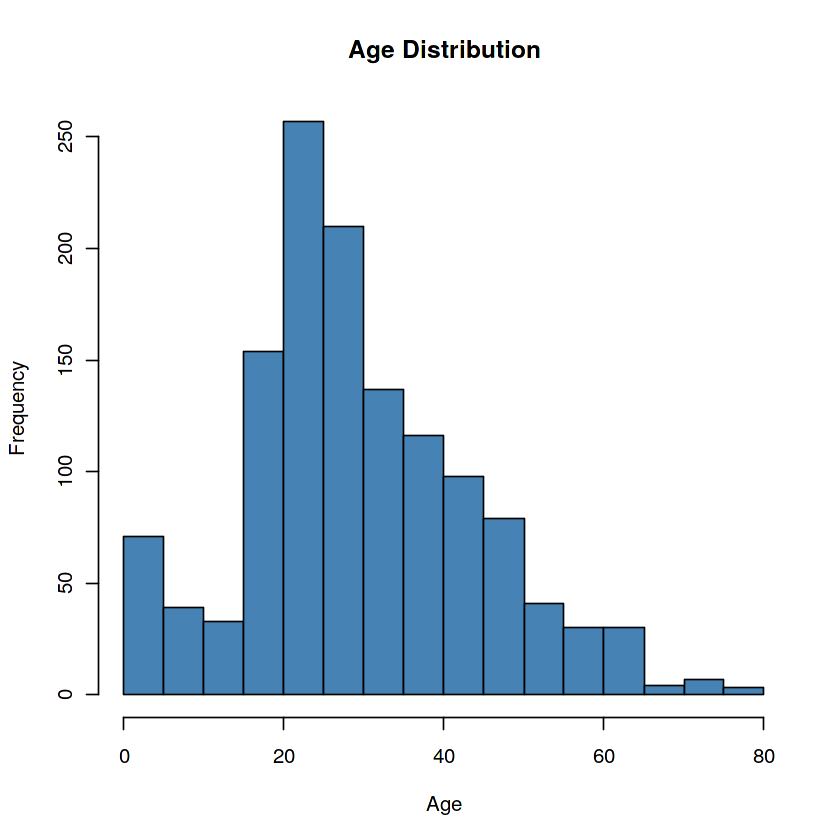

In [9]:
# For the Ages of both male and female:
hist(full$Age, col = 'steelblue', xlab = "Age", main = "Age Distribution")

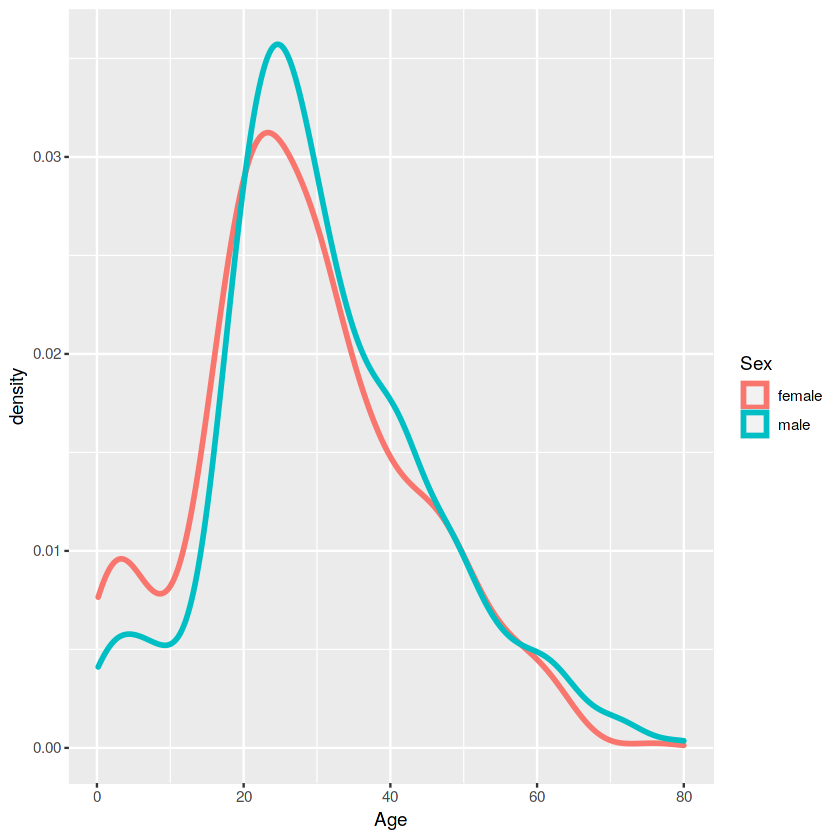

In [10]:
# Age by gender: 
ggplot(data = full, aes(x = Age, col = Sex)) + geom_density(size = 1.2) 

The age distributions looks similar to the one before filling the missing values, thus our random number method did a decent job. Then, we will drop some columns that will not be used in our training models:

In [11]:
# Given too much missing data which make it hard to fill, here I dropped the Cabin variable:
full$Cabin = NULL

# I will also drop the passenger ID variable here since it do not have any meaning to our prediction. I will also drop the Ticket variable here for simple analysis, while it could contain some important information if do deeper analysis
full$PassengerId = NULL
full$Ticket = NULL

**After filling all the missing values and dropped unused features, let's double check the missing values status:**

In [12]:
colSums(is.na(full))

Survived   Pclass     Name      Sex      Age    SibSp    Parch     Fare 
     418        0        0        0        0        0        0        0 
Embarked 
       0

Only the survived variable has missing value (which is normal). Next, let's convert some categorical variables into factor format:

In [13]:
# Convert some variables into factors:
full$Survived = factor(full$Survived)
full$Pclass = factor(full$Pclass)
full$Sex = factor(full$Sex) 
full$Embarked = factor(full$Embarked) 

# 3. Exploratory Data Analysis (EDA):


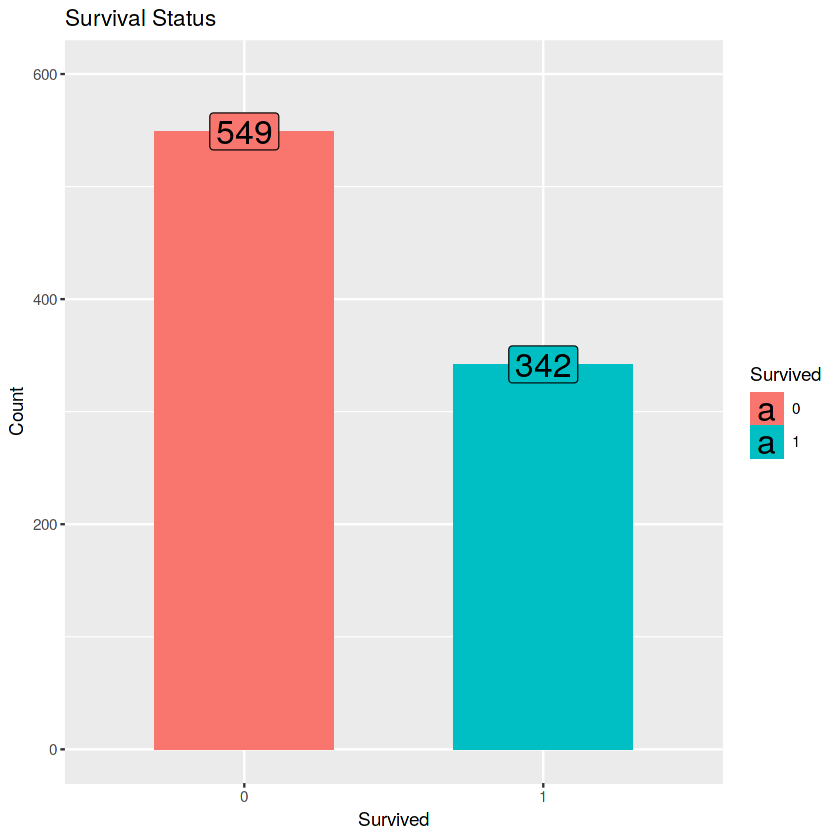

In [14]:
# First, let's check the general status of the survival status (training dataset):
ggplot(data = full[!is.na(full$Survived),], aes(Survived, fill = Survived)) + stat_count(width = 0.6) + labs(x = "Survived", y = "Count", title = "Survival Status") + geom_label(aes(label = ..count..), stat = 'count', size = 7) + theme_grey() + ylim(c(0,600))

There are 549 people dead and 342 survived in the training dataset. Since there were more than 1500 people did not survive during the sank, it could be the same status if our sample is randomly selected.

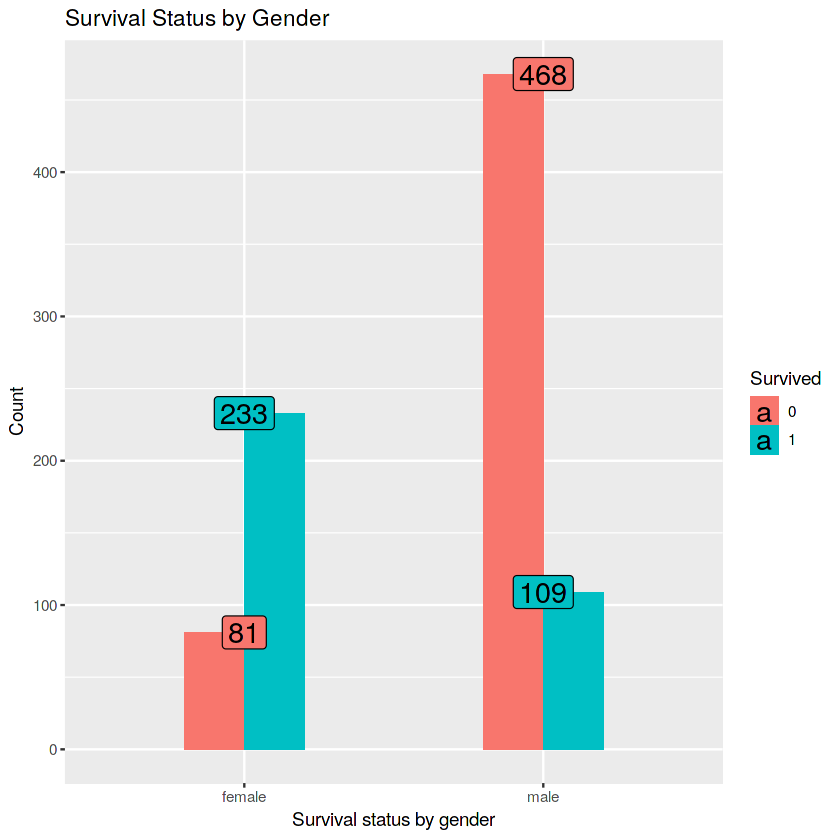

In [15]:
# Check the relationships between the Survival Status and Gender (did men have higher chance to survive than women?)
ggplot(data = full[!is.na(full$Survived),], aes(x = Sex, fill = Survived)) + 
  geom_bar(position = 'dodge', width = 0.4) + geom_label(aes(label = ..count..), stat = 'count',size = 6) + labs(x = 'Survival status by gender', y = 'Count', title = 'Survival Status by Gender') + theme_grey() 

It shows that females had a larger number of surviving and had higher chances to survive than males. Thus gender would play an important role in deciding if a person would survived during the disaster. 

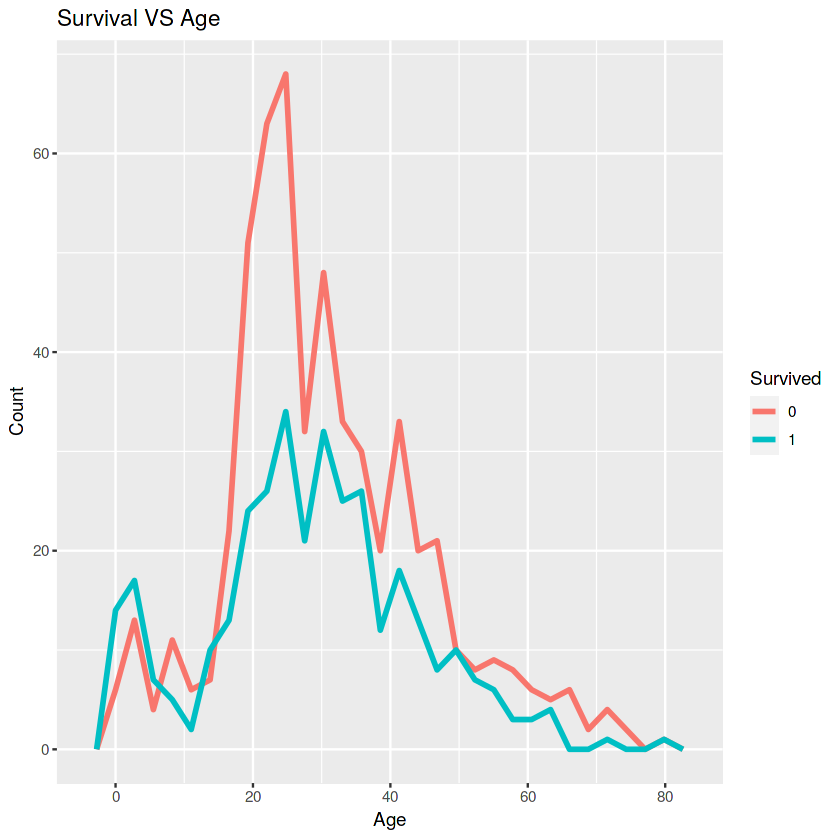

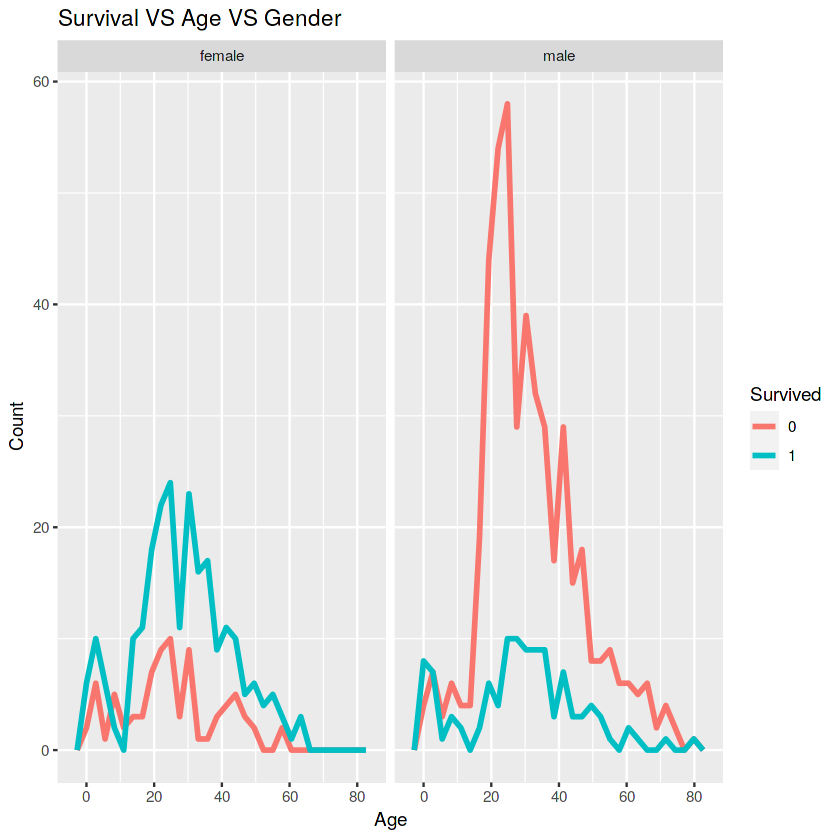

In [16]:
# Check if Age has impact on a person's survival chance (in a whole and compared by gender)
ggplot(data = full[!is.na(full$Survived),], aes(x = Age, col = Survived)) + geom_freqpoly(size = 1.2, bins = 30)  + labs(x = "Age", y = "Count", title = "Survival VS Age") 

ggplot(data = full[!is.na(full$Survived),], aes(x = Age, col = Survived)) + geom_freqpoly(size = 1.2, bins = 30) + facet_wrap(.~Sex) +
labs(x = "Age", y = "Count", title = "Survival VS Age VS Gender")

It appears that in general, children with age lower than 10 has higher rate of survival than other age stages. People in the senior group (age >= 60) had much lower survival rate. Compared with males, females also has much higher survival rates at each age stage than males. Next, let's take a look at the class variable:

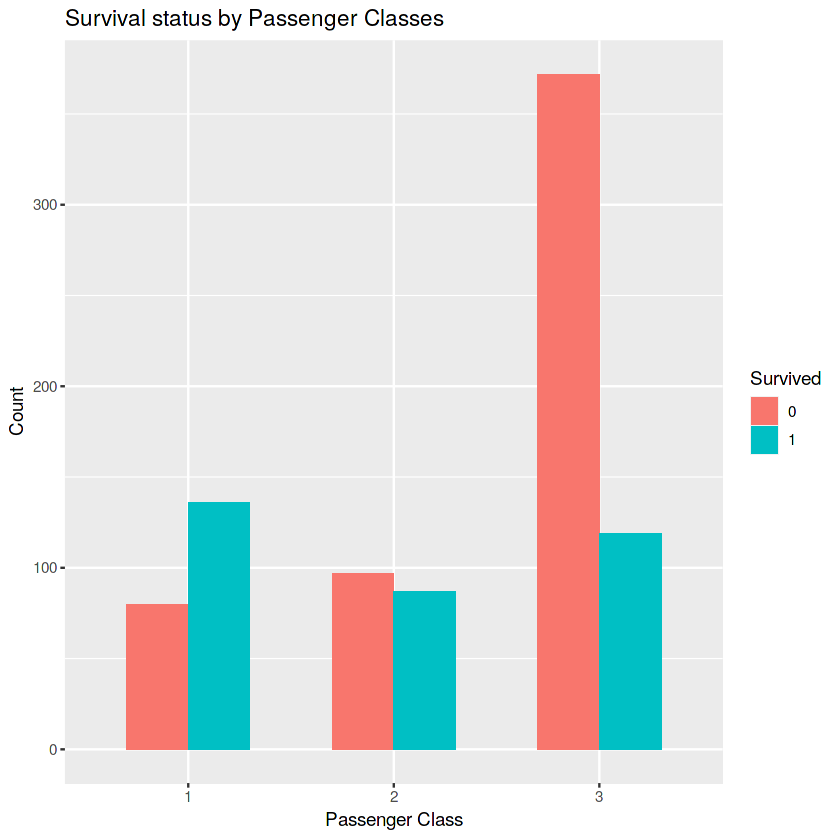

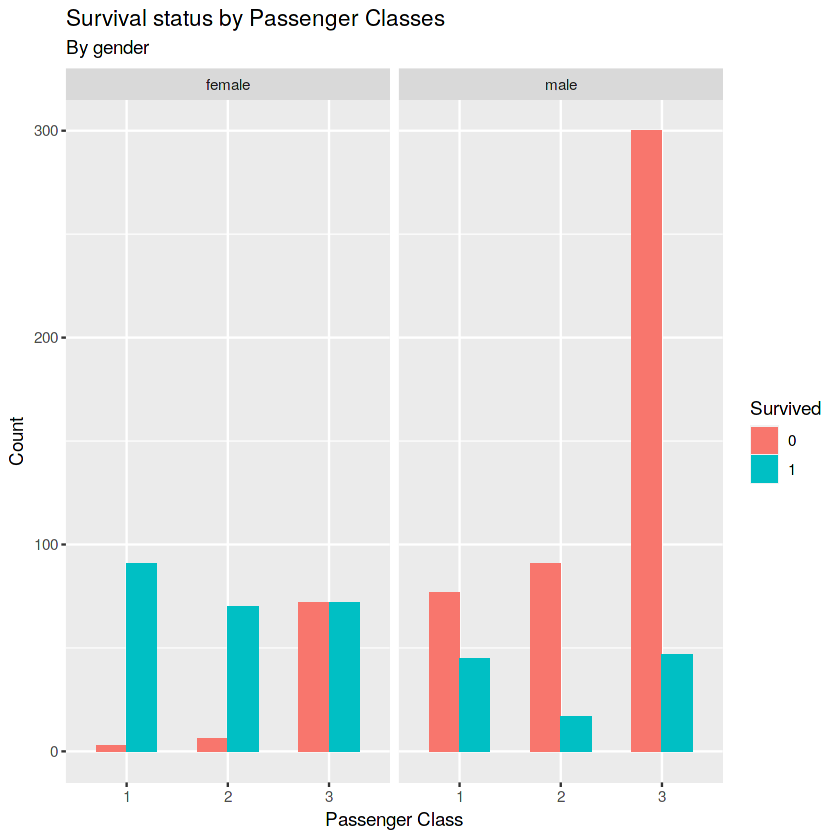

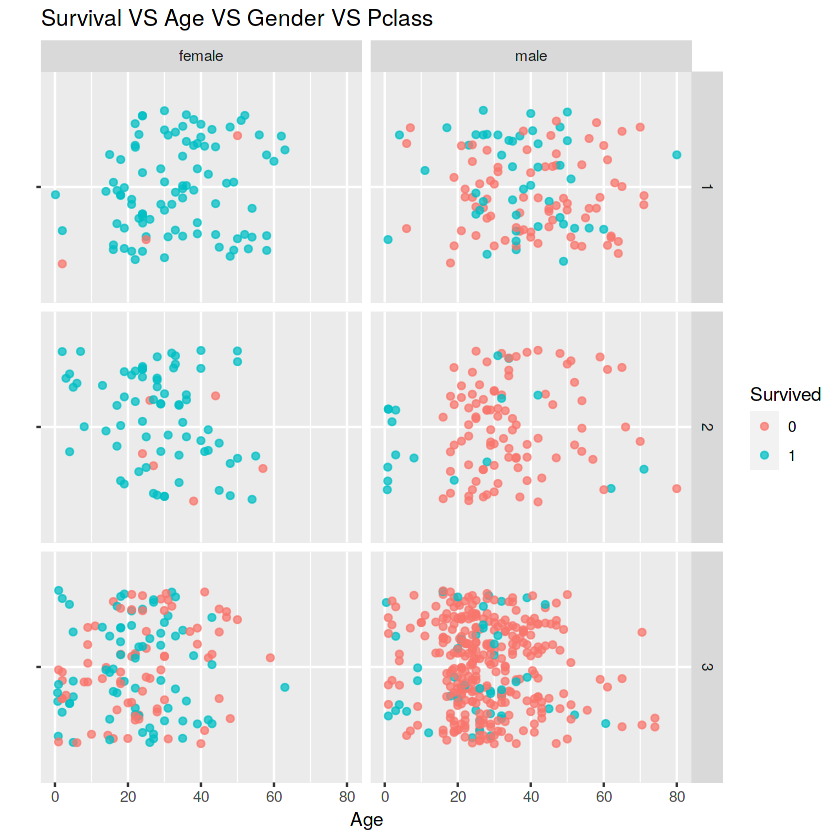

In [17]:
# Check the relationships between Passanger Class and their Survival Status (also by gender):
ggplot(data = full[!is.na(full$Survived),], aes(x = Pclass, fill = Survived)) + 
  geom_bar(position = 'dodge', width = 0.6) + labs(x = 'Passenger Class', y = 'Count', title = 'Survival status by Passenger Classes')

ggplot(data = full[!is.na(full$Survived),], aes(x = Pclass, fill = Survived)) + 
  geom_bar(position = 'dodge', width = 0.6) + facet_wrap(.~Sex) + labs(x = 'Passenger Class', y = 'Count', title = 'Survival status by Passenger Classes', subtitle = 'By gender')

# Check the Age distribution by classes and sex:
ggplot(data = full[!is.na(full$Survived),], aes(x = Age, y = "", col = Survived)) + geom_jitter(size = 1.5, alpha = 0.75) + facet_grid(Pclass ~ Sex) +
labs(x = "Age", title = "Survival VS Age VS Gender VS Pclass") + ylab('') 

It's clear that passengers at the first class has the highest chance to survival than the two other classes, it is reasonable since the fist class could have better conditions and be more accessible to the saving boats than the two other class. Most females in the first and second class survived, and males in all the three classes tend to have the lowest survival chances. 

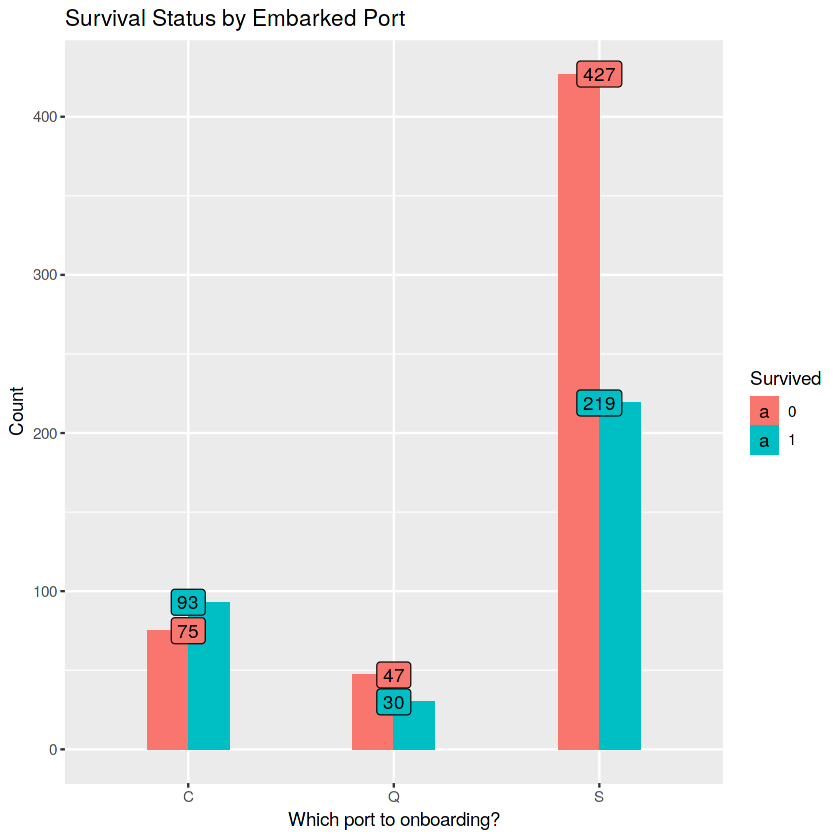

In [18]:
# Next, let's take a look at the Embarked (which port to enter the ship) and Survival status:
ggplot(data = full[!is.na(full$Survived),], aes(x = Embarked, fill = Survived)) + 
  geom_bar(position = 'dodge', width = 0.4) + labs(x = 'Which port to onboarding?', y = 'Count', title = 'Survival Status by Embarked Port') + geom_label(aes(label = ..count..), stat = 'count')

We can find that passenges embarked the ship at Cherbourg has the highest chance to survives, while people onboarded at Southampton had the lowest chance to survive. 

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 15 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”


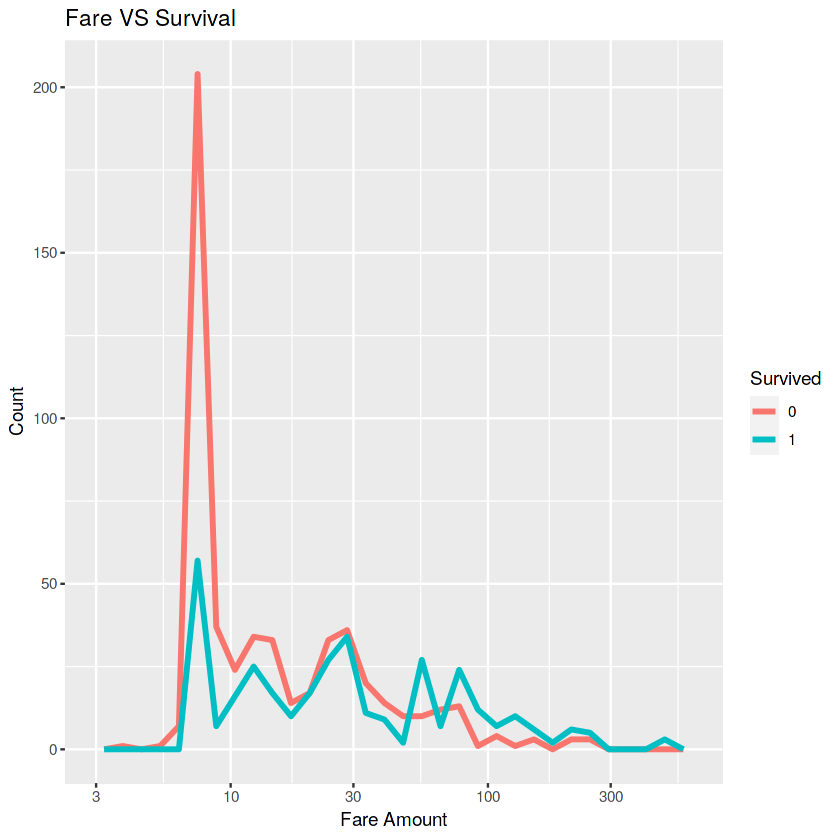

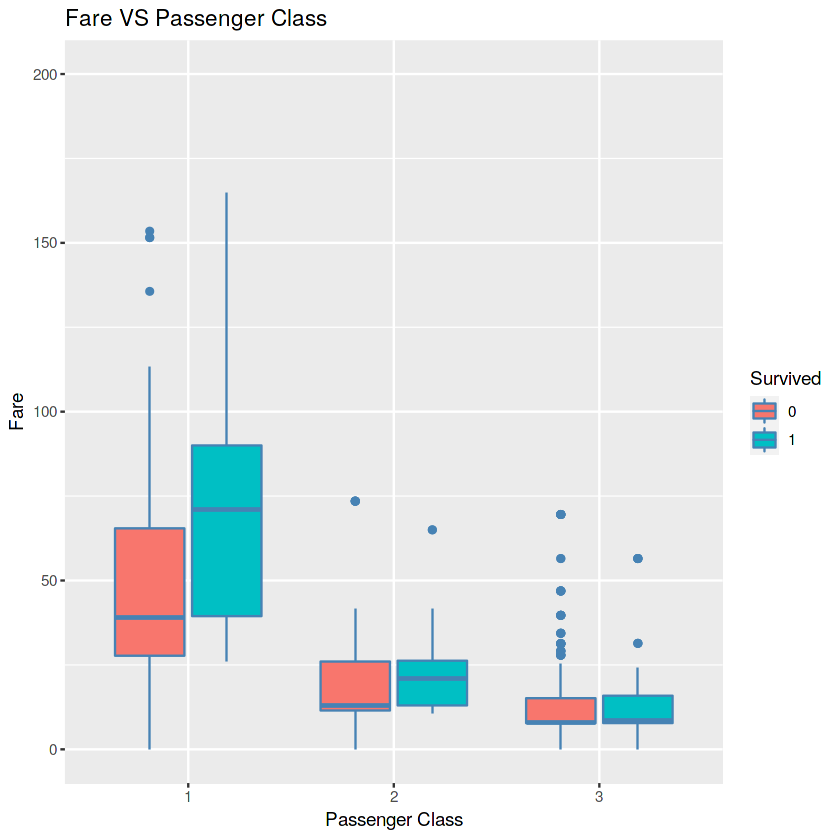

In [19]:
# It is also interesting to see if the ticket fare has relationship to the survival chance and class (higher class has higher price)?
ggplot(data = full[!is.na(full$Survived),], aes(x = Fare, col = Survived)) + scale_x_log10() + geom_freqpoly(size = 1.25, bins = 30) + labs(x = "Fare Amount", y = "Count", title = "Fare VS Survival") + theme_grey()

ggplot(data = full[!is.na(full$Survived),], aes(x = Pclass, y = Fare, fill = Survived)) + geom_boxplot(color = 'steelblue') + ylim(c(0,200)) + labs(x = "Passenger Class", y = "Fare", title = "Fare VS Passenger Class") + 
theme_grey()


It appears higher fare could lead to higher survival chance, and it's clear that the fare at the first class is higher than the two other classes. These two variables should have strong correlation to each other. It is also interesting to see that those who survived in each class (especially in the first class) paid more than those who did not survive. 

There are other variables such as SibSp (the number of siblings or spouses) and Parch (the number of parents and children) that could be summarized and combined to new features. I will explore them at the next step - Feature Engineering. Below showes the correlation plot of some variables with numeric meanings (Pclass here is identified as numeric to find its relationship with the fare variable):

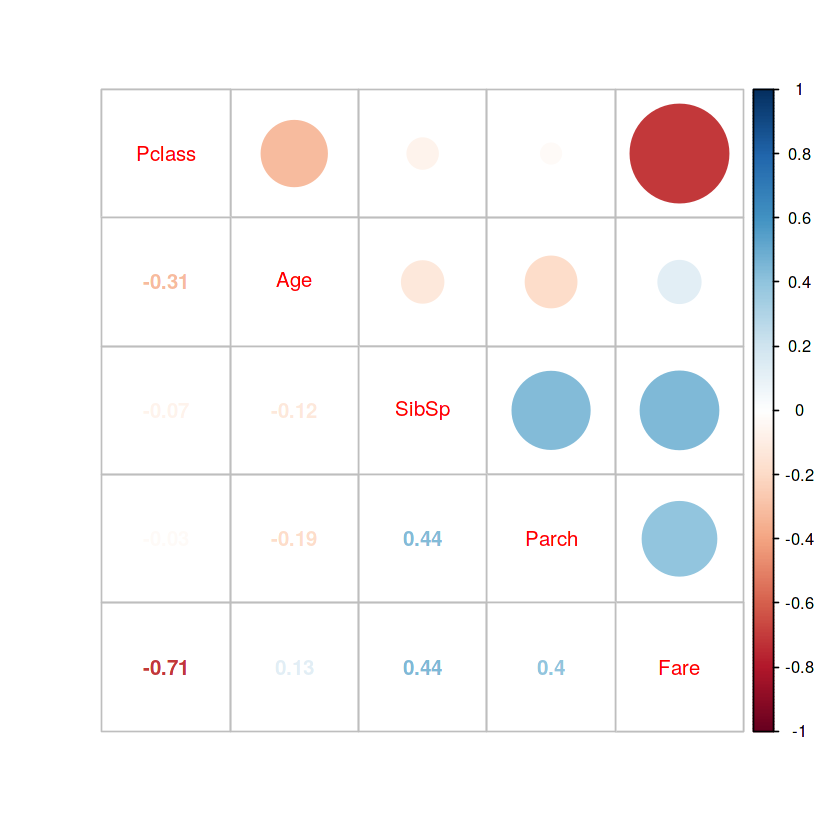

In [20]:
# Extract the numeric variables:
num_vars = full[,c("Pclass","Age","SibSp","Parch","Fare")]
num_vars$Pclass = as.integer(num_vars$Pclass)

# Make the correlation plot. Here I used the Spearman correlation: 
corrplot.mixed(corr = cor(num_vars, method = 'spearman'))

> Class and Fare seem to have strong correlation (0.71), other variables do not seem to have strong relationships. 

# 3. Feature Engineering

The first part of this step is to deal with the Name variable. The title of each passenger (e.g. Mr., Mrs.) identifies his/her gender, age and social class. It is important to take it into consideration when analyzing our survival problem, and many Kagglers have done a lot of deep exploration to this variable in their notebooks, making it a popular feature to this case. Next, I used the str_remove_all function in the stringr package to remove unnessary content and only leave the title part. Then save this to a new variable "title".

In [21]:
# Make the "p_title" variable to get the title from the name variable: (gsub() function is more popular, while here I trid the str_remove_all function)
full$title = str_remove_all(string = full$Name, pattern = '(.*, )|(\\..*)')

table(full$title)


        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

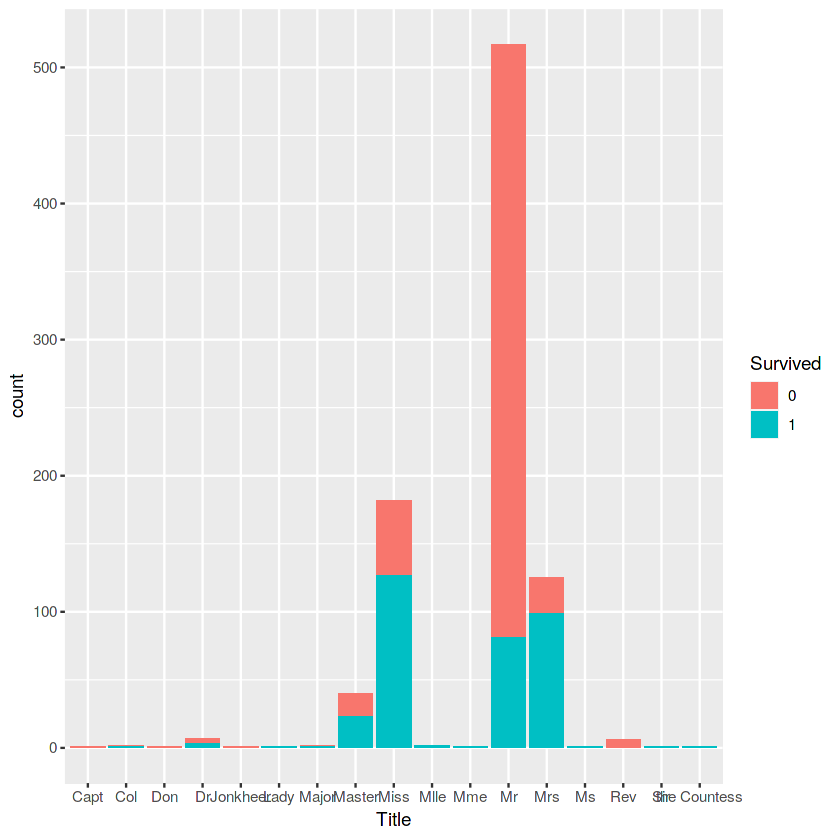

In [22]:
ggplot(full[!is.na(full$Survived),], aes(x = title, fill = Survived)) + geom_bar() + xlab("Title") 

Wow, so many titles, we need to do some summarization. As many Kagglers did in their notebooks, here I will summarize these titles into four parts: Mr, Mrs, Miss and Officer. 

In [23]:
full$title = ifelse(full$title %in% c("Ms", "Mlle", "Dona"), "Miss", full$title)
full$title = ifelse(full$title %in% c("Mme","Lady","the Countess"), "Mrs", full$title)
full$title = ifelse(!full$title %in% c("Miss","Mr","Mrs"), "Officer", full$title)

full$title = factor(full$title)
table(full$title)


   Miss      Mr     Mrs Officer 
    265     757     200      87 

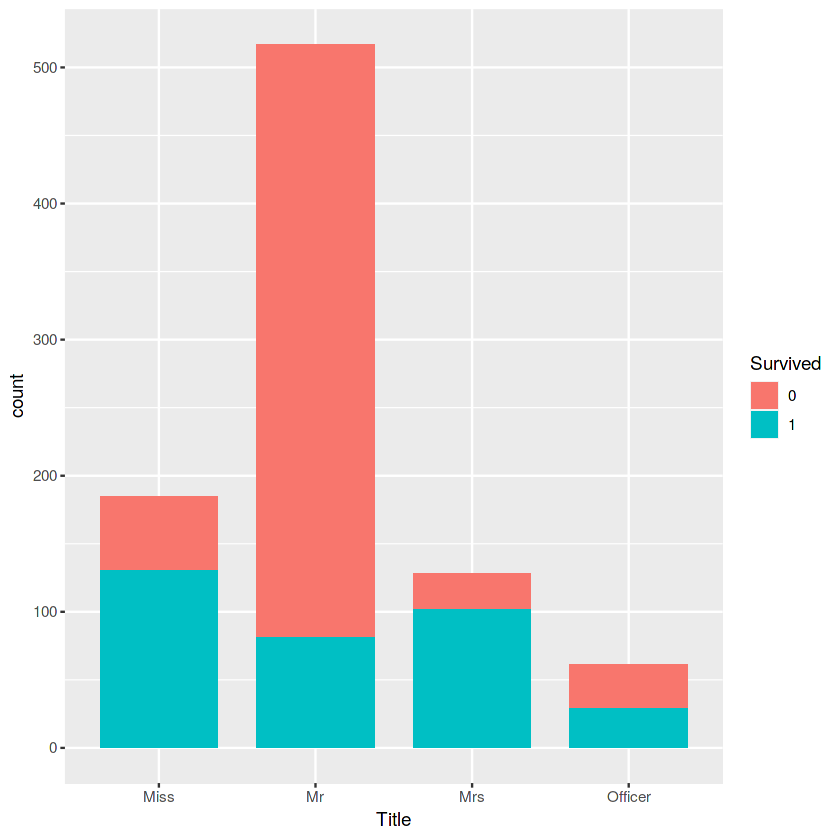

In [24]:
# Let's take a look at the survival status of the three titles after grouping: 
ggplot(full[!is.na(full$Survived),], aes(x = title, fill = Survived)) + geom_bar(width = 0.75) + xlab("Title")

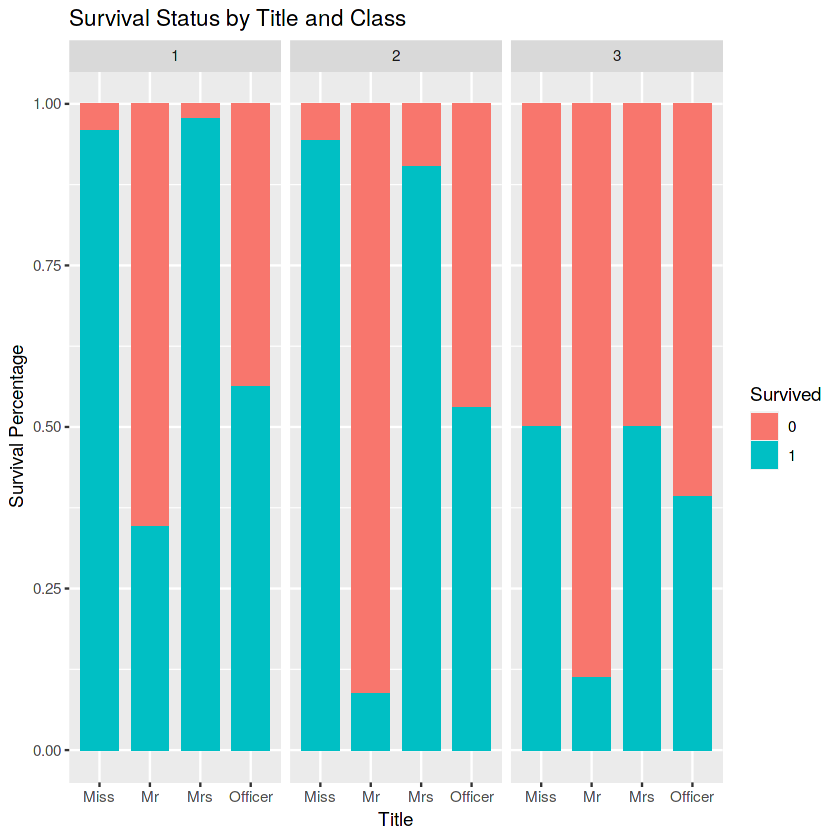

In [25]:
# Look at the survival status by classes: 
ggplot(full[!is.na(full$Survived),], aes(x = title, fill = Survived)) + geom_bar(width = 0.75, position = "fill") + xlab("Title") + facet_wrap(.~Pclass) +
    labs(title = "Survival Status by Title and Class") + ylab("Survival Percentage")

We can find here that females with title of Miss and Mrs have higher survival chances than Mr and Officers. This matches with the survival status of the gender variable and could be used in the prediction models. When shown by classes, we can see that passengers with title of Mrs and Miss in the first and second classes have very high survival rate (> 0.8). Here I created a new group of them as "Female_High_Class":

In [26]:
full$female_high_class = ifelse((full$Pclass %in% c("1", "2")) & (full$title %in% c("Miss","Mrs")), 1, 0)
full$female_high_class = factor(full$female_high_class)

# Check the number of this group:
table(full$female_high_class)


   0    1 
1060  249 

Then, let's take a look at the SibSp and Parch variables:

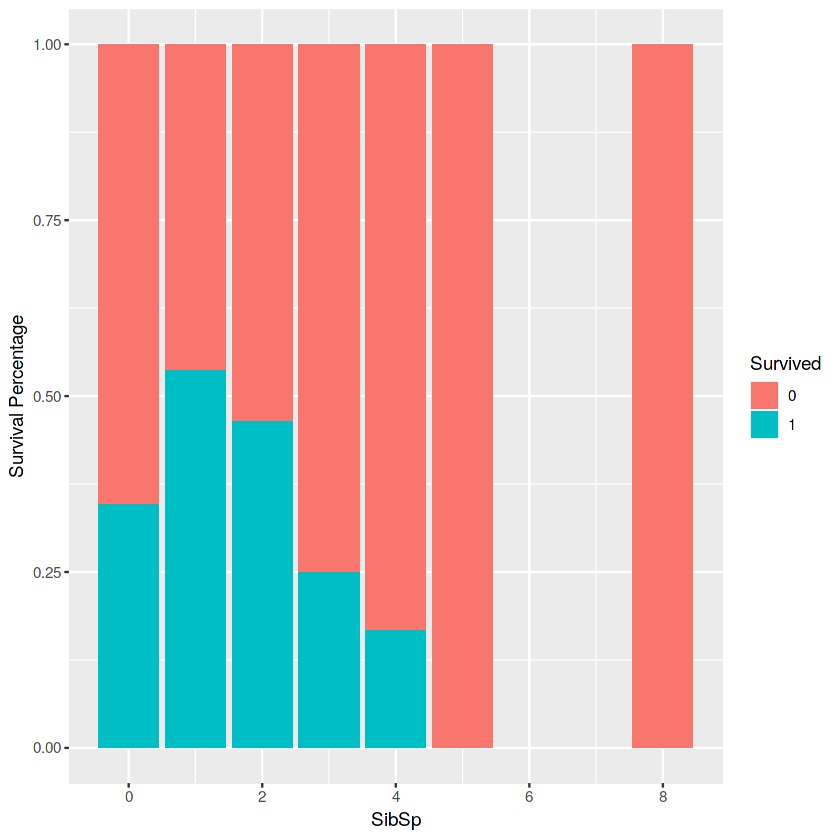

In [27]:
# Take a look at the relationship between a person's number of siblings or spouses and his/her survival chance:
ggplot(full[!is.na(full$Survived),], aes(x = SibSp, fill = Survived)) + geom_bar(position = "fill") + ylab("Survival Percentage")

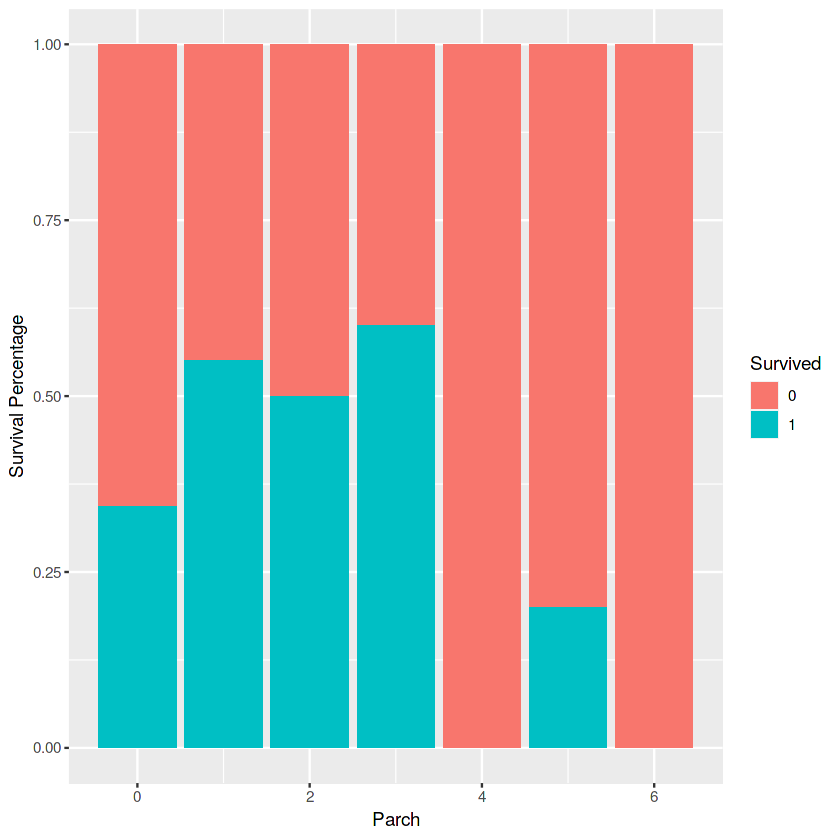

In [28]:
# Take a look at the relationship between a person's number of childern and parents and his/her survival chance:
ggplot(full[!is.na(full$Survived),], aes(x = Parch, fill = Survived)) + geom_bar(position = "fill") + ylab("Survival Percentage")

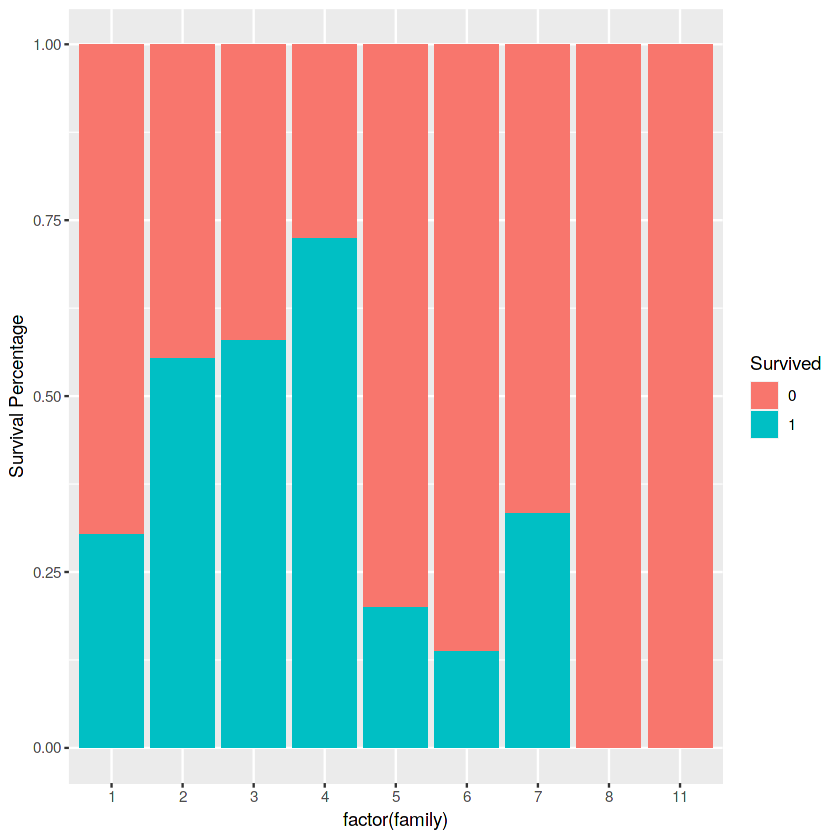

In [29]:
# Then, adding these two variables together to see the relationship between family size and survival rate:
full$family = full$SibSp + full$Parch + 1
ggplot(full[!is.na(full$Survived),], aes(x = factor(family), fill = Survived)) + geom_bar(position = "fill") + ylab("Survival Percentage")

We can find here that a person's survival rate would be high (over 0.5) if he/she were accompanied with 1 - 3 familiy members. For person only by themselves or having more than 3 family members, his/her survival rate would be low. So here I created three bins to summarize the family size as "single", "small", "large": 

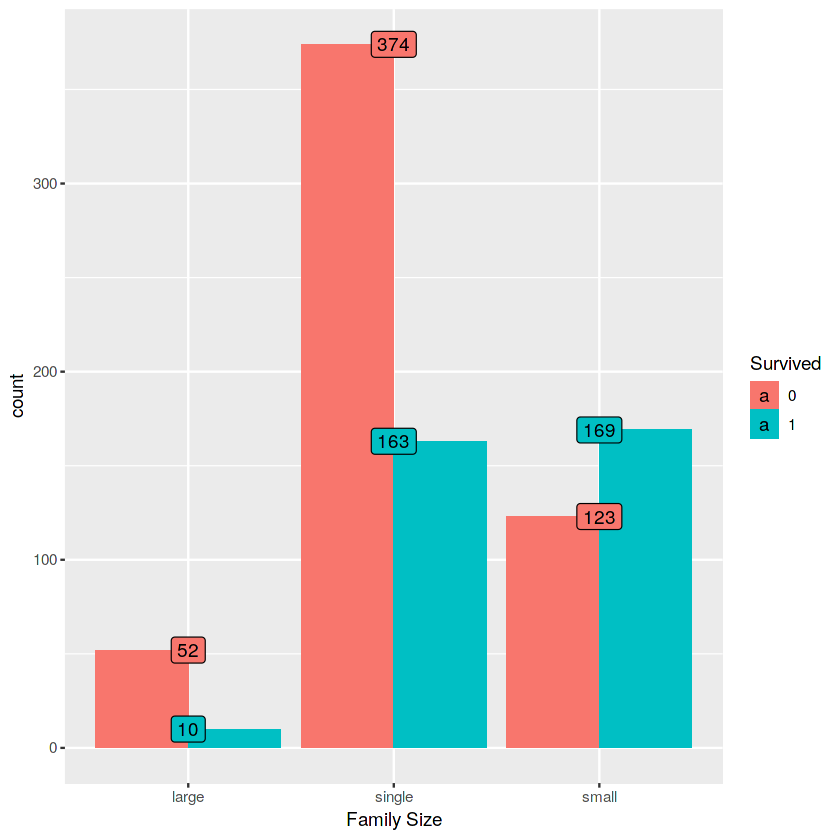

In [30]:
# Make a new variable to binning the family size variable:
full$family_g = case_when(full$family == 1 ~ "single", full$family > 1 & full$family <= 4 ~ "small", full$family > 4 ~ "large")
full$family_g = factor(full$family_g)

# Let's take a look at these groups:
ggplot(full[!is.na(full$Survived),], aes(x = family_g, fill = Survived)) + geom_bar(position ="dodge", size = 0.75) + geom_label(stat = 'count', aes(label = ..count..)) +
    xlab("Family Size") 

We can see that the "small" group has about 60% survival rate, while the "single" and "large" groups have very low survival rates (< 30%). 

Now let's prepare for the training and testing datasets. The variables that will be put into the prediction models are Survived (Y Variable), Pclass, Sex, Age, Embarked, Title, Female_high_class, Family Group and Fare. 

In [31]:
# Select the training and testing variables: 
full = full[, c("Survived", "Pclass", "Sex", "Age", "Embarked", "title", "female_high_class", "family_g","Fare")]

# Split the full data into train and test files:
# Here I will use 80% of train data (712) as training and 20% (179) to check the prediction performance:
train = full[1:712,]
test = full[713:891,]

str(train)
str(test)

tibble [712 × 9] (S3: tbl_df/tbl/data.frame)
 $ Survived         : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass           : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex              : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age              : num [1:712] 22 38 26 35 35 31 54 2 27 14 ...
 $ Embarked         : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ title            : Factor w/ 4 levels "Miss","Mr","Mrs",..: 2 3 1 3 2 2 2 4 3 3 ...
 $ female_high_class: Factor w/ 2 levels "0","1": 1 2 1 2 1 1 1 1 1 2 ...
 $ family_g         : Factor w/ 3 levels "large","single",..: 3 3 2 3 2 2 2 1 3 3 ...
 $ Fare             : num [1:712] 7.25 71.28 7.92 53.1 8.05 ...
tibble [179 × 9] (S3: tbl_df/tbl/data.frame)
 $ Survived         : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 1 1 2 1 ...
 $ Pclass           : Factor w/ 3 levels "1","2","3": 1 3 2 3 1 2 3 3 2 3 ...
 $ Sex              : Factor w/ 2 levels "female","male": 2 2 2 2 1 

# 4. Modeling Process

**Here I will use Logistic Regression, Naive Bayes, Decision Tree，Support Vector Machine (SVM) and Linear Discriminant Analysis (LDA) to predict the survival outcomes:**

*Logistics Regression*

In [32]:
# Build the Logistics Regression Classifier:
logit_model = glm(formula = Survived ~., data = train, family = "binomial")

# Use the step() function to choose the model with the lowest AIC score:
logit_model = step(logit_model)
summary(logit_model)

Start:  AIC=619.81
Survived ~ Pclass + Sex + Age + Embarked + title + female_high_class + 
    family_g + Fare


Step:  AIC=619.81
Survived ~ Pclass + Age + Embarked + title + female_high_class + 
    family_g + Fare

                    Df Deviance    AIC
- Embarked           2   595.84 617.84
- Fare               1   593.92 617.92
<none>                   593.81 619.81
- Age                1   599.16 623.16
- Pclass             2   606.74 628.74
- female_high_class  1   615.14 639.14
- family_g           2   620.00 642.00
- title              3   662.87 682.87

Step:  AIC=617.84
Survived ~ Pclass + Age + title + female_high_class + family_g + 
    Fare

                    Df Deviance    AIC
- Fare               1   596.09 616.09
<none>                   595.84 617.84
- Age                1   600.73 620.73
- Pclass             2   609.36 627.36
- female_high_class  1   616.49 636.49
- family_g           2   626.85 644.85
- title              3   674.39 690.39

Step:  AIC=616.09
Survi


Call:
glm(formula = Survived ~ Pclass + Age + title + female_high_class + 
    family_g, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9697  -0.5623  -0.4865   0.3995   2.3574  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.273480   0.612671  -0.446 0.655328    
Pclass2            -1.322880   0.360702  -3.668 0.000245 ***
Pclass3            -1.274847   0.303404  -4.202 2.65e-05 ***
Age                -0.017947   0.008123  -2.209 0.027147 *  
titleMr            -2.183977   0.296768  -7.359 1.85e-13 ***
titleMrs           -0.030095   0.409355  -0.074 0.941393    
titleOfficer       -0.203732   0.461731  -0.441 0.659042    
female_high_class1  2.290792   0.538666   4.253 2.11e-05 ***
family_gsingle      2.339952   0.510837   4.581 4.64e-06 ***
family_gsmall       2.415942   0.506692   4.768 1.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Disper

Using the step AIC technique, the final model with the lowest AIC score contains these variables: passenger class, age, their title, female_high_class and family group. Next goes to the prediction step:

In [33]:
# Calculate the predicted survival probability using the test data:
prob_pred_logit = predict(logit_model, type = 'response', newdata = test)

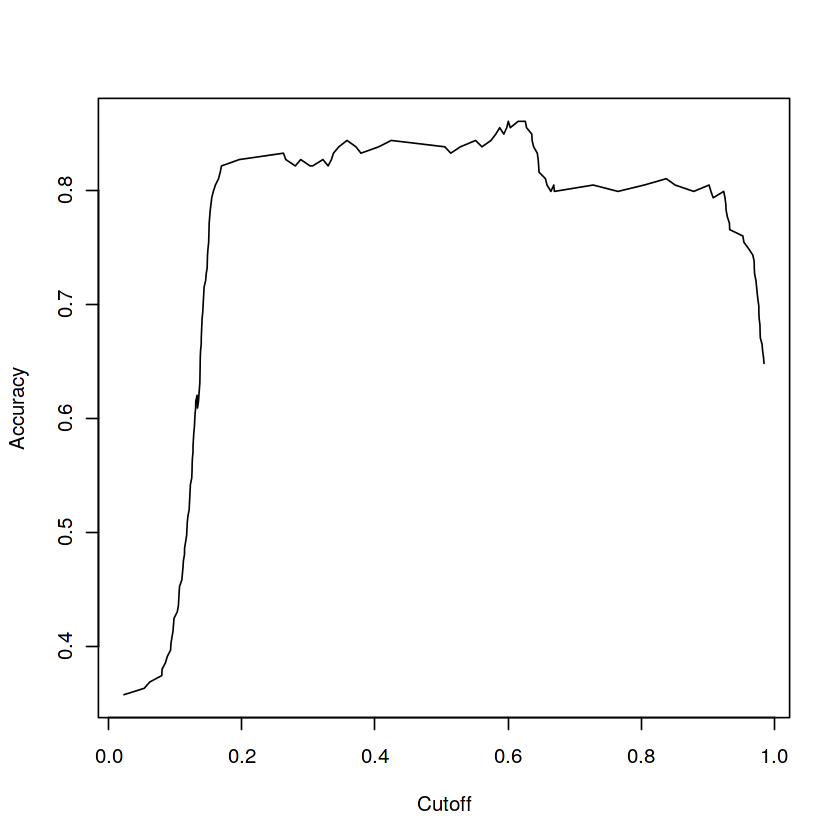

In [34]:
# Create ROC plot to find out the optimal cut-off ratio: 
pred_logit = prediction(predictions = prob_pred_logit, labels = test$Survived)
perf_logit = performance(pred_logit, "acc")
plot(perf_logit)

In [35]:
# It seems that 0.6 (60%) is supposed to be the optimal cut-off ratio, which would yield the highest accuracy ratio. Next, classifiy the prediction and check the prediction performance by building the confusion matrix (caret package):
y_pred = factor(ifelse(prob_pred_logit > 0.6, 1, 0), levels = c(0,1))
confusionMatrix(test$Survived, y_pred)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 107   8
         1  17  47
                                          
               Accuracy : 0.8603          
                 95% CI : (0.8008, 0.9075)
    No Information Rate : 0.6927          
    P-Value [Acc > NIR] : 1.559e-07       
                                          
                  Kappa : 0.6862          
                                          
 Mcnemar's Test P-Value : 0.1096          
                                          
            Sensitivity : 0.8629          
            Specificity : 0.8545          
         Pos Pred Value : 0.9304          
         Neg Pred Value : 0.7344          
             Prevalence : 0.6927          
         Detection Rate : 0.5978          
   Detection Prevalence : 0.6425          
      Balanced Accuracy : 0.8587          
                                          
       'Positive' Class : 0               
                              

**The logistics regression model yields 86% accuracy rate with cut-off ratio at 0.6.**

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Survived, predictor = prob_pred_logit,     plot = T)

Data: prob_pred_logit in 115 controls (test$Survived 0) < 64 cases (test$Survived 1).
Area under the curve: 0.9056

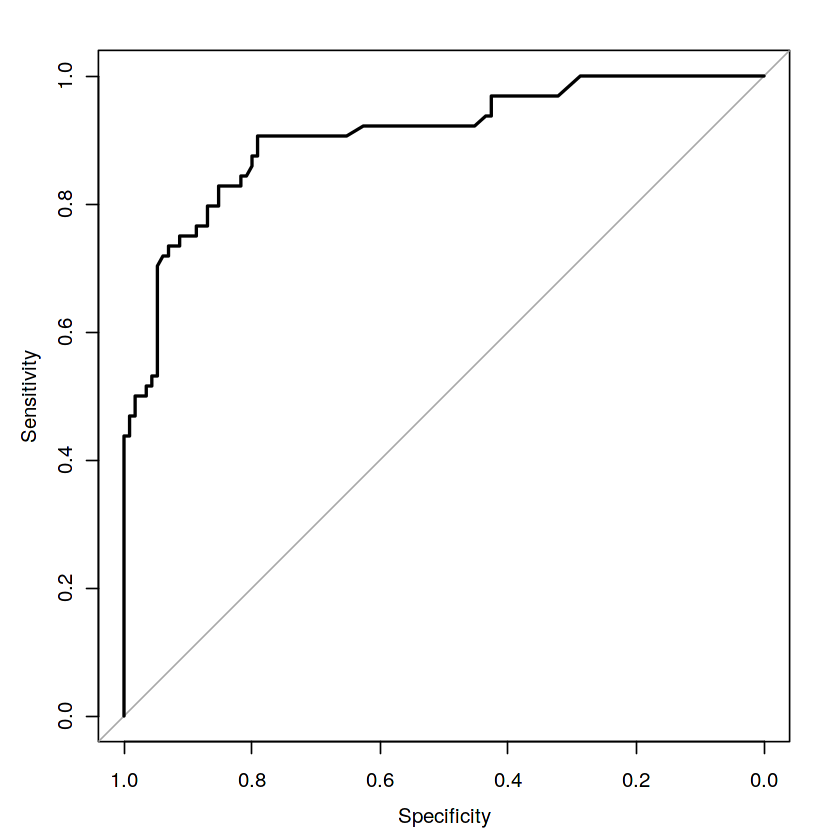

In [36]:
# Make the ROC plot to visulize the model performance: 
roc(test$Survived, prob_pred_logit, plot = T)

As we can see from the ROC plot and confusion matrix, the logstics regression model did a pretty good job in predicting the survival status for the test data. Next, let's try to make another prediction task using the Naive Bayes Classifier.

*Naive Bayes*

In [37]:
# Build the Naive Bayes classifier and print out its summary: 
nb_model = naiveBayes(Survived ~., data = train)
nb_model
summary(nb_model)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.6095506 0.3904494 

Conditional probabilities:
   Pclass
Y           1         2         3
  0 0.1566820 0.1728111 0.6705069
  1 0.3848921 0.2589928 0.3561151

   Sex
Y      female      male
  0 0.1520737 0.8479263
  1 0.6834532 0.3165468

   Age
Y       [,1]     [,2]
  0 30.81797 14.63696
  1 28.58036 14.60439

   Embarked
Y            C          Q          S
  0 0.14516129 0.08294931 0.77188940
  1 0.26978417 0.10071942 0.62949640

   title
Y         Miss         Mr        Mrs    Officer
  0 0.10368664 0.79493088 0.04838710 0.05299539
  1 0.40647482 0.24460432 0.27697842 0.07194245

   female_high_class
Y            0          1
  0 0.98387097 0.01612903
  1 0.53956835 0.46043165

   family_g
Y        large     single      small
  0 0.09677419 0.66129032 0.24193548
  1 0.02877698 0.48561151 0.48561151

   Fare
Y       [,1]     [,

          Length Class  Mode     
apriori   2      table  numeric  
tables    8      -none- list     
levels    2      -none- character
isnumeric 8      -none- logical  
call      4      -none- call     

Make prediction using the classifier:

In [38]:
# Predict the probability of survival and labels:
nb_prob_pred = predict(nb_model, test, type = 'raw')
nb_pred = predict(nb_model, test)

# Using confusion matrix to evaluate the model's performance:
confusionMatrix(nb_pred, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 104  19
         1  11  45
                                         
               Accuracy : 0.8324         
                 95% CI : (0.7695, 0.884)
    No Information Rate : 0.6425         
    P-Value [Acc > NIR] : 1.586e-08      
                                         
                  Kappa : 0.6248         
                                         
 Mcnemar's Test P-Value : 0.2012         
                                         
            Sensitivity : 0.9043         
            Specificity : 0.7031         
         Pos Pred Value : 0.8455         
         Neg Pred Value : 0.8036         
             Prevalence : 0.6425         
         Detection Rate : 0.5810         
   Detection Prevalence : 0.6872         
      Balanced Accuracy : 0.8037         
                                         
       'Positive' Class : 0              
                                         

The Naive Bayes Classifier yields an accuracy of 83.8%, slightly lower than the logitsic regression model. Next, let's try to predict using the decision tree classifier.

*Decision Tree Classifier*

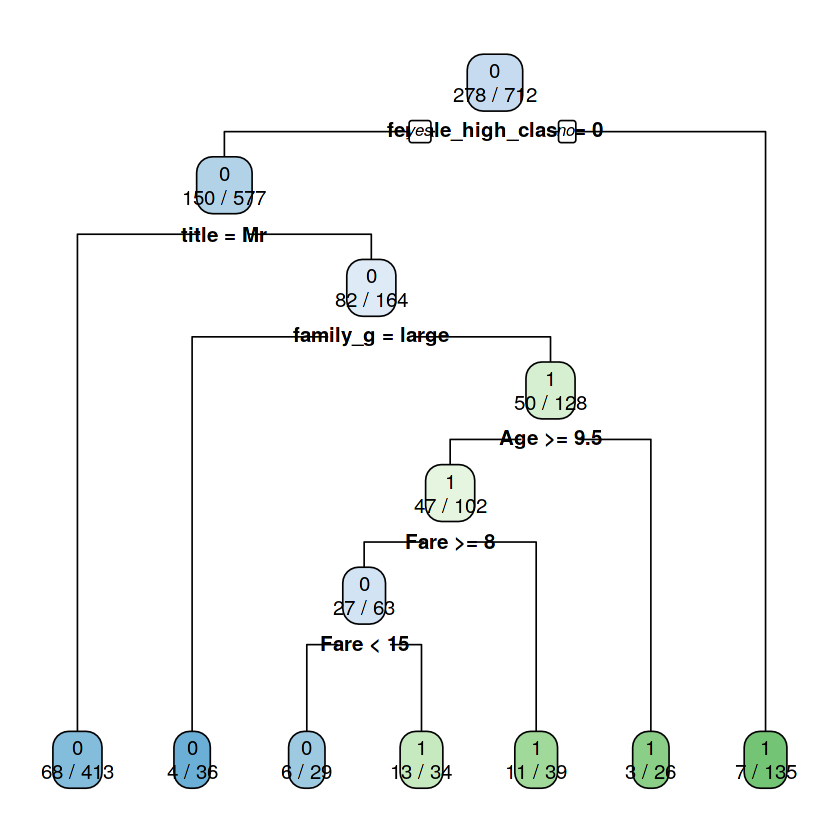

In [39]:
# Build the decision tree classifier: 
set.seed(100)
dt_model = rpart(Survived~., data=train)
rpart.plot(dt_model, extra = 3, fallen.leaves = T)

Make predictions based on the classifier:

In [40]:
dt_pred = predict(dt_model, newdata = test, type = "class")
confusionMatrix(dt_pred, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 102  17
         1  13  47
                                         
               Accuracy : 0.8324         
                 95% CI : (0.7695, 0.884)
    No Information Rate : 0.6425         
    P-Value [Acc > NIR] : 1.586e-08      
                                         
                  Kappa : 0.6301         
                                         
 Mcnemar's Test P-Value : 0.5839         
                                         
            Sensitivity : 0.8870         
            Specificity : 0.7344         
         Pos Pred Value : 0.8571         
         Neg Pred Value : 0.7833         
             Prevalence : 0.6425         
         Detection Rate : 0.5698         
   Detection Prevalence : 0.6648         
      Balanced Accuracy : 0.8107         
                                         
       'Positive' Class : 0              
                                         

The decision tree classifier gives an accuracy rate of 83.2%, slightly higher than the Naives Bayes model but lower than the logistic regression model.

*Support Vector Machine (SVM)*

Make the SVM classifier using the Radial Kernal:

In [41]:
# Set seeds and build the model: 
set.seed(123)
svm_model = svm(Survived ~., data = train, kernal = "radial", scale = TRUE)
summary(svm_model)


Call:
svm(formula = Survived ~ ., data = train, kernal = "radial", scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  352

 ( 178 174 )


Number of Classes:  2 

Levels: 
 0 1




Make predictions using the SVM classifier:

In [42]:
# Make predictions using the SVM model:
svm_pred = predict(svm_model, test)
confusionMatrix(svm_pred, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 103  12
         1  12  52
                                          
               Accuracy : 0.8659          
                 95% CI : (0.8071, 0.9122)
    No Information Rate : 0.6425          
    P-Value [Acc > NIR] : 1.615e-11       
                                          
                  Kappa : 0.7082          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8957          
            Specificity : 0.8125          
         Pos Pred Value : 0.8957          
         Neg Pred Value : 0.8125          
             Prevalence : 0.6425          
         Detection Rate : 0.5754          
   Detection Prevalence : 0.6425          
      Balanced Accuracy : 0.8541          
                                          
       'Positive' Class : 0               
                              

The SVM predictor yields an accuracy rate of 87.15%, higher than the Logistic Regression, Naive Bayes and Decision Tree classifier. Last, let's try our prediction using Linear Discriminant Analysis (LDA):

*Linear Discriminant Analysis (LDA)*

In [43]:
lda_model = lda(Survived ~., data = train)
print(lda_model)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


Call:
lda(Survived ~ ., data = train)

Prior probabilities of groups:
        0         1 
0.6095506 0.3904494 

Group means:
    Pclass2   Pclass3   Sexmale      Age  EmbarkedQ EmbarkedS   titleMr
0 0.1728111 0.6705069 0.8479263 30.81797 0.08294931 0.7718894 0.7949309
1 0.2589928 0.3561151 0.3165468 28.58036 0.10071942 0.6294964 0.2446043
   titleMrs titleOfficer female_high_class1 family_gsingle family_gsmall
0 0.0483871   0.05299539         0.01612903      0.6612903     0.2419355
1 0.2769784   0.07194245         0.46043165      0.4856115     0.4856115
      Fare
0 23.43539
1 46.67566

Coefficients of linear discriminants:
                            LD1
Pclass2            -0.533629328
Pclass3            -0.686855064
Sexmale            -0.766889643
Age                -0.009829411
EmbarkedQ           0.130613331
EmbarkedS          -0.152295514
titleMr            -0.926433872
titleMrs            0.022687951
titleOfficer        0.597162950
female_high_class1  1.190277528
family_gsingle 

In [44]:
# Make predictions using the test data:
lda_pred = predict(lda_model, newdata = test)
names(lda_pred)
confusionMatrix(lda_pred$class, test$Survived)

[1] "class"     "posterior" "x"

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 100  14
         1  15  50
                                          
               Accuracy : 0.838           
                 95% CI : (0.7757, 0.8887)
    No Information Rate : 0.6425          
    P-Value [Acc > NIR] : 5.581e-09       
                                          
                  Kappa : 0.6486          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8696          
            Specificity : 0.7812          
         Pos Pred Value : 0.8772          
         Neg Pred Value : 0.7692          
             Prevalence : 0.6425          
         Detection Rate : 0.5587          
   Detection Prevalence : 0.6369          
      Balanced Accuracy : 0.8254          
                                          
       'Positive' Class : 0               
                              

The LDA classifier yields an accuracy rate of 83.8%, which is similar to the performance of the Logistics Regression, Decision Tree, Naive Bayes and Linear Discriminant Analysis (LDA) classifiers. Therefore, based on the prediction performance on the test data, the Support Vector Machine (SVM) did the best job. 

In [45]:
# Create the output prediction file using the SVM classifier:
testing = full[c(892:1309),]
testing$Survived = NULL
test_prediction = predict(svm_model, testing)

prediction = data.frame(PassengerId = c(892:1309), Survived = test_prediction)
write.csv(prediction, 'Submission.csv')

# 6. Summary

As a new comer to Kaggle and the data science field, I found it's critical to practise my data analytics skills and "data scientist mind" by applying the knowledge I have learned from academic courses and online materials. Kaggle is definitely a wonderful place for me to boost my ability to solve the real-world problems by cleaning, analyzing and modeling data from diverse industries. As my first tryout, this notebook must include some pieces that need to be improved, please leave any feedback below and upvote if you think my work is useful. Thank you for reading my journey of the Titanic data analysis! :)